In [1]:
import pandas as pd
%matplotlib inline

In [87]:
df = pd.read_csv('/Users/oisin-brogan/Data/cooking_time/view_duration_sample_20170830.csv')
df.head()

,event_time,log_time,guid,event,client_time,event_id,event_name,country,language,application_id,...,referer,via,ref,position,view_duration,local_event_time,resource_id,resource_owner_id,app_version,os_version
0,2017-08-02 12:01:56+00,2017-08-02 12:02:03+00,NaN,view_duration,NaN,NaN,NaN,ID,id,1,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,2017-07-31 11:30:20+00,2017-07-31 11:30:27+00,NaN,view_duration,NaN,NaN,NaN,SA,ar,1,...,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN
2,2017-07-24 12:51:48+00,2017-08-04 04:53:34+00,NaN,view_duration,NaN,NaN,NaN,AE,ar,1,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2017-08-04 21:24:09+00,2017-08-04 21:34:20+00,NaN,view_duration,NaN,NaN,NaN,SA,ar,1,...,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
4,2017-08-20 15:07:46+00,2017-08-20 15:07:50+00,NaN,view_duration,NaN,NaN,NaN,SA,ar,1,...,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN


In [3]:
df.view_duration.describe().round(1)

count     70000.0
mean         78.6
std         605.7
min           0.0
25%           5.0
50%          15.0
75%          40.0
max      127695.0
Name: view_duration, dtype: float64

In [88]:
#To remove the outliers, like 127695 minutes, let's just look at the 95th percentile
reasonable = df[df.view_duration < df.view_duration.quantile(.95)]

In [91]:
reasonable.groupby('platform').view_duration.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
app-android,23906.0,28.452606,34.380583,1.0,6.0,16.0,38.0,221.0
app-ios,37749.0,24.993483,33.696001,0.0,4.0,13.0,32.0,221.0


In [92]:
reasonable.groupby('language').view_duration.describe()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
ar,15922.0,22.505024,30.919364,0.0,3.00,11.0,29.00,221.0
da,1.0,111.000000,NaN,111.0,111.00,111.0,111.00,111.0
el,805.0,30.916770,35.522528,0.0,7.00,18.0,42.00,205.0
en,2056.0,27.177043,37.056645,0.0,5.00,13.0,34.00,219.0
es,8210.0,28.491352,35.391763,0.0,5.00,15.0,39.00,221.0
fa,18.0,17.666667,24.774275,1.0,2.00,8.0,25.75,97.0
fr,15.0,12.466667,14.126301,0.0,3.50,14.0,14.50,56.0
hu,2529.0,29.127323,37.602039,0.0,5.00,16.0,38.00,219.0
id,31028.0,27.289255,34.302897,0.0,5.00,15.0,36.00,221.0


In [8]:
df.groupby('country').view_duration.describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
AE,871.0,56.820896,209.040298,0.0,4.00,13.0,34.00,3331.0
AR,2580.0,91.797287,358.951030,0.0,6.00,17.0,46.00,5865.0
BH,224.0,44.781250,133.586610,0.0,5.00,15.0,38.25,1349.0
BO,56.0,83.714286,244.262952,1.0,6.00,20.0,49.00,1526.0
BR,45.0,32.244444,51.412395,0.0,6.00,17.0,34.00,315.0
CL,601.0,86.349418,338.595232,0.0,6.00,19.0,46.00,4337.0
CO,186.0,64.451613,163.042824,0.0,7.00,20.0,55.50,1214.0
CR,69.0,94.043478,201.505688,0.0,4.00,17.0,60.00,1019.0
CU,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0


In [75]:
from scipy.stats import mannwhitneyu

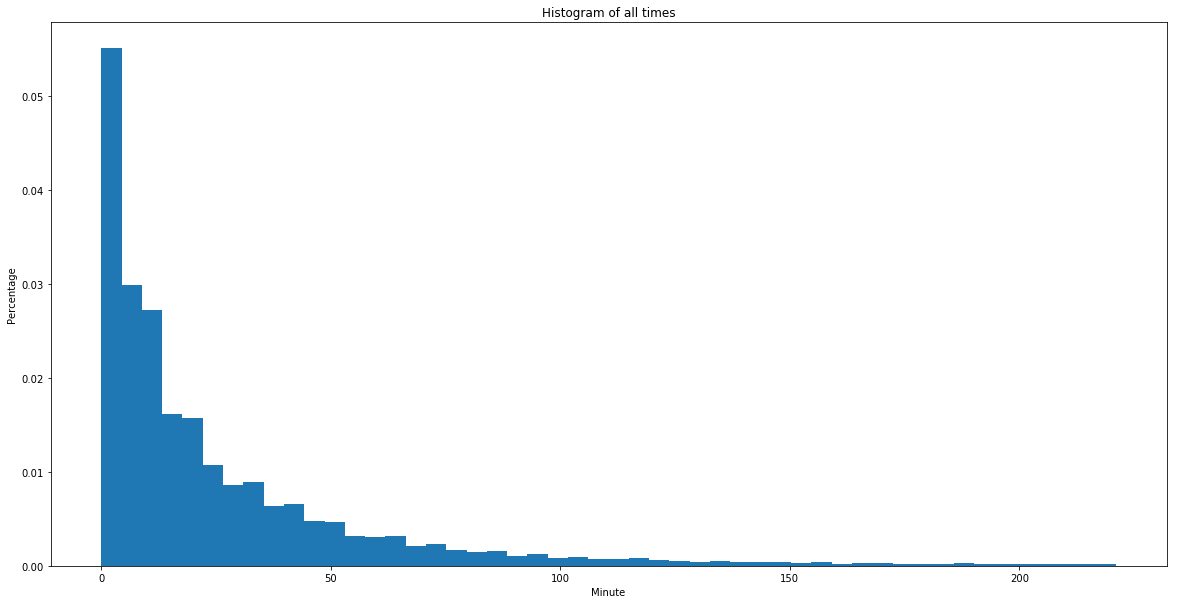

In [97]:
import matplotlib.pyplot as plt
ax = reasonable.view_duration.plot(bins=50, normed = True, kind='hist', figsize = [20,10])
ax.set_title('Histogram of all times')
ax.set_ylabel('Percentage')
ax.set_xlabel('Minute')

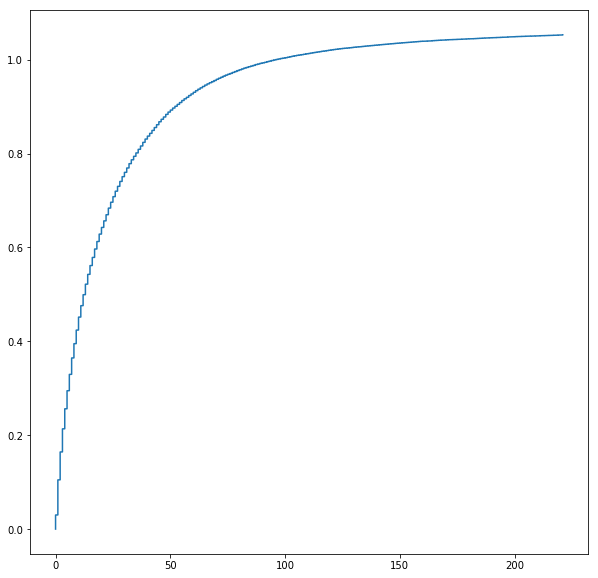

In [103]:
fig = plt.figure(figsize=[10,10])
p = plt.plot(reasonable.view_duration.sort_values().values, reasonable.index/reasonable.shape[0])

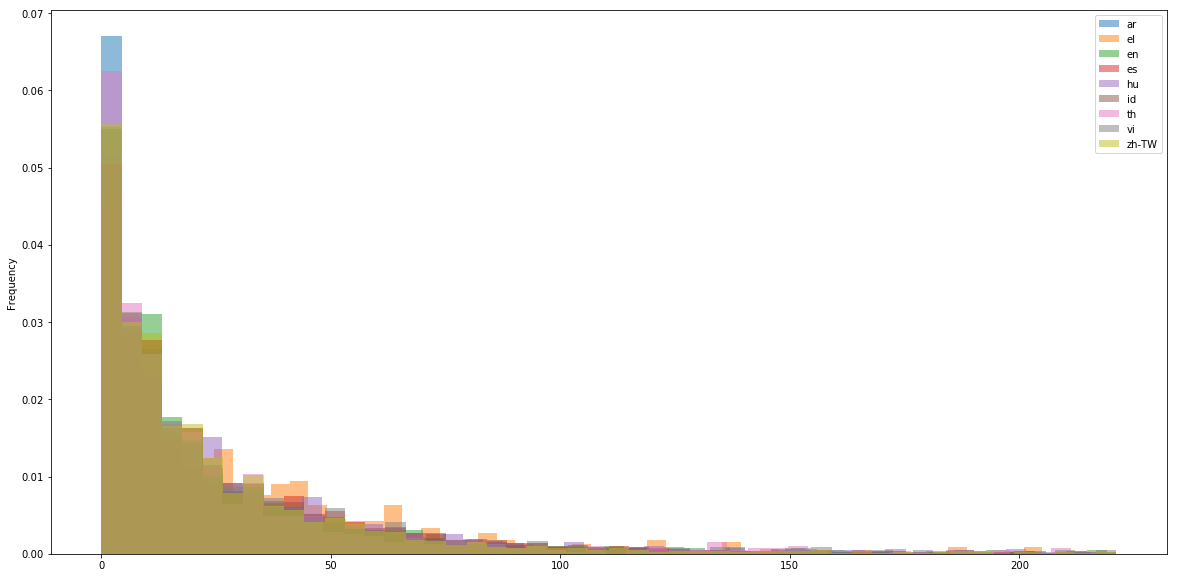

In [56]:
ax = reasonable.groupby('language').filter(lambda x: len(x) > 100).groupby('language').view_duration.plot(bins=50, normed = True,
                                                                    kind = 'hist', figsize=(20,10), legend = True, alpha = .5)
ax.set_title('Histogram of all times')
ax.set_ylabel('Percentage')
ax.set_xlabel('Minute')